Модель Вольтерра - Лотки - это система состоящая из двух уравнений:

dx/dt=(alpha-beta*y)x;
dy/dt=(-gamma+delta*x)y.

где:
x - кол-во жертв,
у - кол-во хищников,
t - время,
alpha, beta, gamma, delta - коэффициенты, которые отражают взаимодействия между видами, например: за размножение жертв отвечает alpha, за гибель жертв и прирост за счет этого популяции хищников- betа и delta соответственно, когда популяция жертв недостаточно, хищники начинают вымирать - за это отвечает коэффициент gamma

Устойчивость системы - это способность системы сохранять текущее состояние при влиянии внешних воздействий. Критерий устойчивости - определение того, какое состояние системы является устойчивым. Выберем такой критерий - пусть отношение численности жертв к численности хищников на грани вымирания будет равно 1.1.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, fsolve
import math

class Biome(object):

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self._n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.xlabel('time')
        plt.ylabel('n')
        plt.plot(self.time, self.pred, label='predators', color='r')
        plt.plot(self.time, self.prey, label='preys', color='b')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.xlabel('n predators')
        plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()

In [59]:
criterion = 1.1#критерий устойчивости

def comparsion_func(coef):
    alpha, beta, gamma, delta = coef
    #начальные условия
    x0 = 1
    y0 = 1

    x_s = gamma / delta
    y_s = alpha / beta
    
    #значение константы, получаемое из математической модели Вольтерра - Лотки
    c = beta * y0 + delta * x0 - alpha * np.log(np.abs(y0)) - gamma * np.log(np.abs(x0))
    
    #формулы для определения пиковых значений численности жертв и хищников
    def get_x(x):
        return beta * y_s + delta * x - alpha * np.log(np.abs(y_s)) - gamma * np.log(np.abs(x)) - c
    
    def get_y(y):
        return beta * y + delta * x_s - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x_s)) - c

    x_min = fsolve(get_x, 0.001)#кол-во жертв на пике вымирания
    y_min = fsolve(get_y, 0.001)#кол-во хищников на пике вымирания
    
    return np.abs(y_min / x_min - criterion)#условие для миниммизации


Значения коэффициентов:[2.0312349  1.93701248 1.9687651  2.06298752]


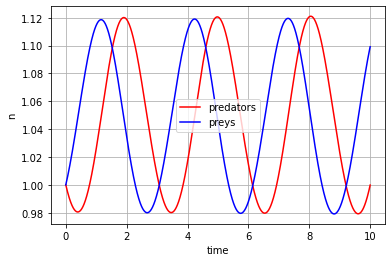

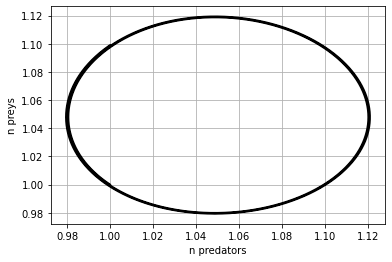

In [60]:
def main():
    solution = minimize(comparsion_func, [2,2,2,2])
    biome = Biome()
    biome.run(*solution.x)
    print('Значения коэффициентов:{}'.format(solution.x))
    biome.plot()
    biome.plot_cycle()

main()